# Part2 - Import libraries and new customer dataset 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path 
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Instacart_Basket_Analysis'

In [3]:
# Import new customer data set from the 'Original Data' folder as a dataframe
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ordrs_prods_customers_merged.pkl'))

## Step2. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

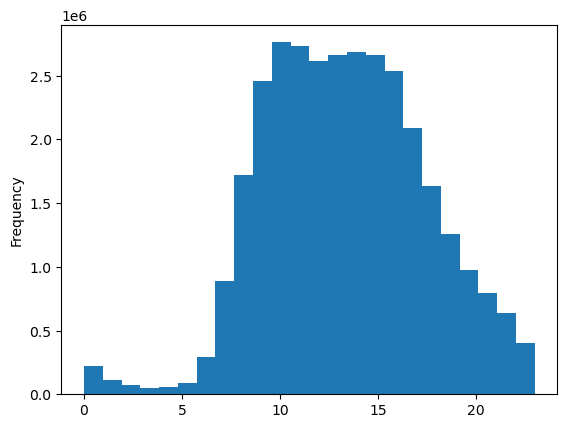

In [4]:
hist = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

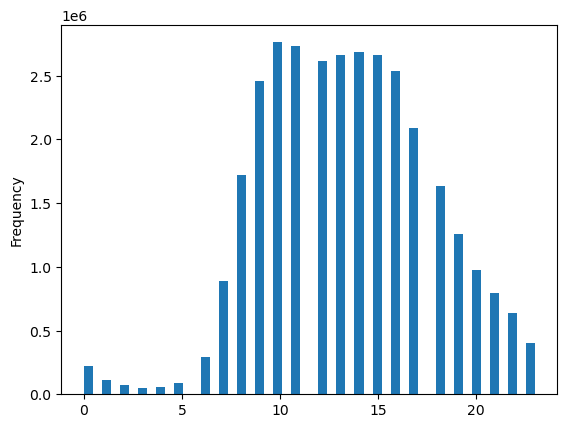

In [5]:
# Creating histogram of the 'order_time_of_day' column (by increasing granularity)

hist_2 = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 50)

### Observation - The histogram shows the frequency of orders for each hour.During night we can see lower frequency, that means less orders.Most of the orders are placed between 10 and 11 am, with busy times followed till 5 pm after which it decreases through the night.

### Step 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

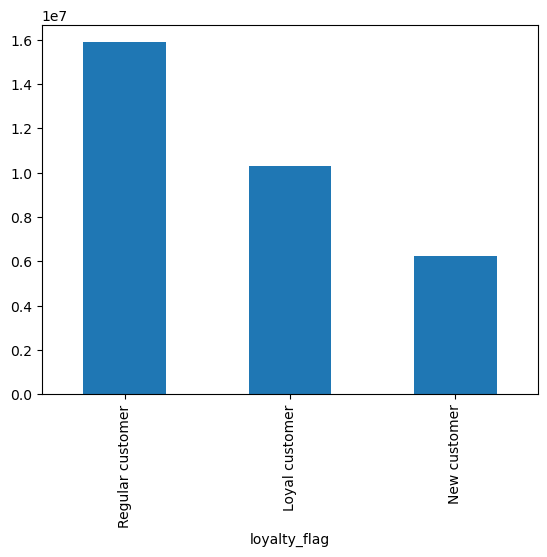

In [6]:
# Create a bar chart from the 'loyalty_flag column' 

bar = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

#### Observation:The majority of the customer base is defined as 'regular customers', which means that they have placed between 10 - 40 orders.

### Step 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [7]:
# Create a random sample by generating a seed
np.random.seed(4)

In [8]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [9]:
#Store 70% of the sample in the dataframe big
big = ords_prods_customers_merge[dev]

In [10]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers_merge[~dev]

In [11]:
# Compare the dataframe length to the sum of the big and small samples
len(ords_prods_customers_merge)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
#A new dataframe that contains only the prices and order_hour_of_day columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [14]:
#Check output
df_2.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


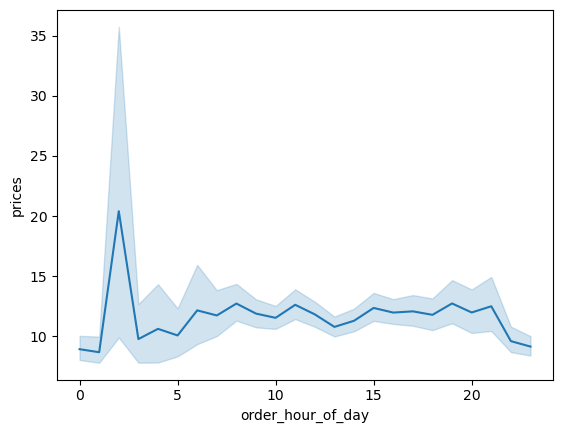

In [15]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### Observation - We see a higher level of expenditure early in the morning which is also the time where there's a lower number of orders. At the peak hours of 10 - 11am, we see the low level of expenditure which might indicate that there are higher number of orders with low value at that time.

## Step 6 To conduct some exploratory analysis of customer demographics for targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [17]:
#Create a new dataframe that contains only the age and n_dependants columns from small subset 
df_3 = small[['age','n_dependants']]

In [18]:
#Check output
df_3

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,74,3
32404842,74,3
32404843,74,3
32404849,74,3


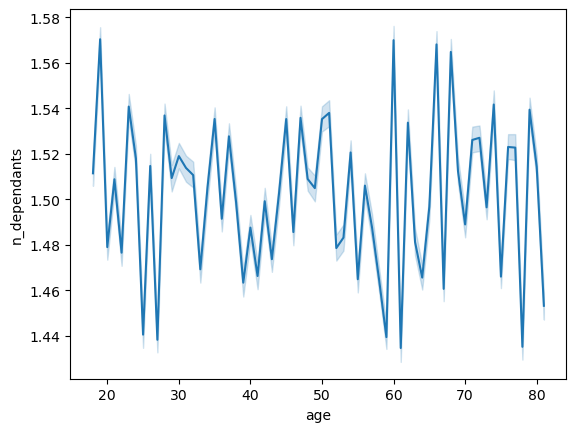

In [21]:
# Create a Line Chart after data sampling (on small df - 30% of df)
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

### Observation - The Line Chart gives a very fluctuating picture indicating that there is no clear relationship between age and number of dependents.

## Step 7 Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [22]:
# Create a new dataframe that contains only the age and income columns from small subset
df_4 = small[['age','income']]

In [23]:
#Check output
df_4

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423
...,...,...
32404841,74,137969
32404842,74,137969
32404843,74,137969
32404849,74,137969


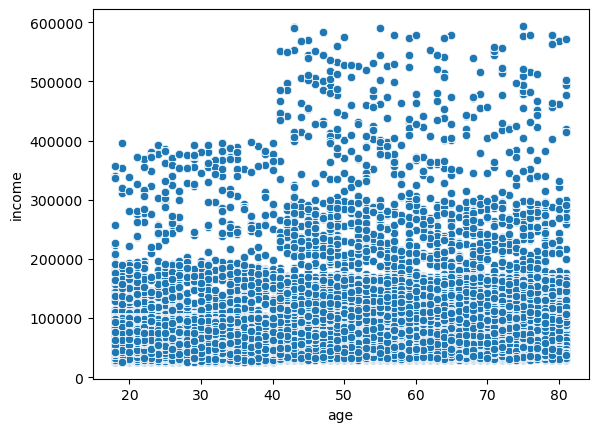

In [24]:
# Create a scatterplot
scatterplot_2 = sns.scatterplot(data = df_4, x = 'age', y = 'income')

### Observation - 
Across all ages, most incomes are below 200K.  

For individuals up to 40 years old, incomes remain under 400K, with fewer cases between 200K and 400K.  

At age 40, there is a noticeable jump in income levels.  

Beyond 40, incomes still cluster mostly below 200K, with a moderate presence in the 200K–300K range and fewer instances above 300K.


## Step8 - Export the visualizations 

In [25]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [26]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [27]:
# Export Line chart - expenditure (prices column) depending on the hour of the day
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure_over_hours_of_day.png'))

In [28]:
# Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_n_dependents.png'))

In [30]:
# Export scatterplot - connection between age and spending power (income)
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))

In [31]:
# Export Histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_bin50.png'))